# Ask the Calculator Glass Questions

Here we are going to ask the calculator questions about glass.

In [12]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_DEMICE' / 'TEMP')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_DEMICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\blond\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_DEMICE\TEMP


In [13]:
import PV_DEMICE
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

## 0% & 100% Recycle of Glass

First, create the simulation and the scenarios, pointing them at the Temp folder.

In [14]:
sim1 = PV_DEMICE.Simulation(name='Recycle Extremes', path=testfolder)
sim1.createScenario(name='Recycle_0', file=r'..\baselines\baseline_modules_US.csv')
sim1.scenario['Recycle_0'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')

sim1.createScenario(name='Recycle_100', file=r'..\baselines\baseline_modules_US.csv')
sim1.scenario['Recycle_100'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')

path = C:\Users\blond\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_DEMICE\TEMP


In [18]:
sim1.scenario['Recycle_0'].data.keys()

Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_EOL_collection_eff', 'mod_EOL_collected_recycled',
       'mod_Repowering', 'mod_Repairing'],
      dtype='object')

In [17]:
sim1.scenario['Recycle_100'].material['glass'].materialdata.keys()

Index(['year', 'mat_virgin_eff', 'mat_massperm2', 'mat_MFG_eff',
       'mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff',
       'mat_MFG_scrap_Recycled_into_HQ',
       'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG',
       'mat_EOL_collected_Recycled', 'mat_EOL_Recycling_eff',
       'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG'],
      dtype='object')

Now set the variables within the scenarios to the relevant quantities

In [50]:
#Set 0% recycled for both MFG and EOL - pure linear
sim1.scenario['Recycle_0'].data['mod_EOL_collected_Recycled']=0
sim1.scenario['Recycle_0'].data['mod_Repowering']=0
sim1.scenario['Recycle_0'].data['mod_Repairing']=0
sim1.scenario['Recycle_0'].material['glass'].materialdata['mat_MFG_scrap_Recycled'] = 0
sim1.scenario['Recycle_0'].material['glass'].materialdata['mat_EOL_collected_Recycled'] = 0

#directs all glass back to mfg to offset virgin, both MFG and EOL
sim1.scenario['Recycle_100'].data['mod_EOL_collected_Recycled']=100
sim1.scenario['Recycle_100'].data['mod_EOL_collection_eff']=100
sim1.scenario['Recycle_100'].data['mod_Repowering']=0
sim1.scenario['Recycle_100'].data['mod_Repairing']=0

sim1.scenario['Recycle_100'].material['glass'].materialdata['mat_MFG_scrap_Recycled'] = 100
sim1.scenario['Recycle_100'].material['glass'].materialdata['mat_MFG_scrap_Recycling_eff'] = 100
sim1.scenario['Recycle_100'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ'] = 100 #directs all to close loop
sim1.scenario['Recycle_100'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'] = 100
sim1.scenario['Recycle_100'].material['glass'].materialdata['mat_EOL_Recycling_eff'] = 100
sim1.scenario['Recycle_100'].material['glass'].materialdata['mat_EOL_Recycled_into_HQ'] = 100 #directs all to close loop
sim1.scenario['Recycle_100'].material['glass'].materialdata['mat_EOL_RecycledHQ_Reused4MFG'] = 100 
sim1.scenario['Recycle_100'].material['glass'].materialdata['mat_EoL_Recycled_HQ_into_MFG'] = 100

In [51]:
#plt.plot(sim1.scenario['Recycle_100'].data['mod_EOL_collection_eff']) #check out what module paramaters settings
#plt.plot(sim1.scenario['Recycle_100'].material['glass'].materialdata['mat_EoL_Recycled_HQ_into_MFG']) #check out what material parameters settings

Now run the simulation

In [52]:
sim1.calculateMassFlow()

Working on Scenario:  Recycle_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  Recycle_100
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass


In [26]:
#plt.plot(sim1.scenario['Recycle_100'].data['mod_EOL_collection_eff']) #check out what module paramaters settings
#plt.plot(sim1.scenario['Recycle_100'].material['glass'].materialdata['mat_MFG_scrap_Recycled']) #check out what material parameters settings

Now make some pretty pretty plots

In [9]:
#sim1.scenario['Recycle_0'].data.keys() #choices of what to plot

In [10]:
#sim1.plotScenariosComparison(keyword='Installed_Capacity_[W]') #make sure installed capacity is same

There is a separate plotting function for materials

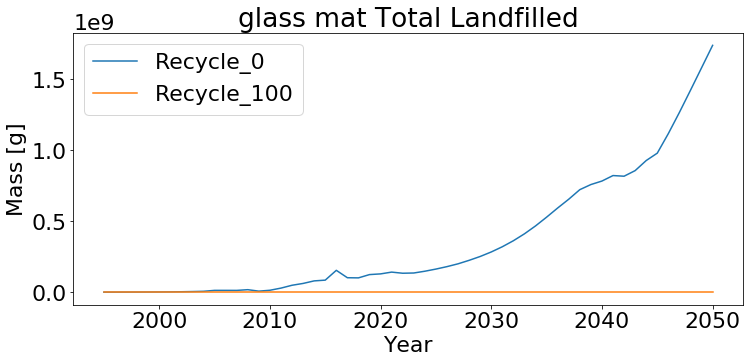

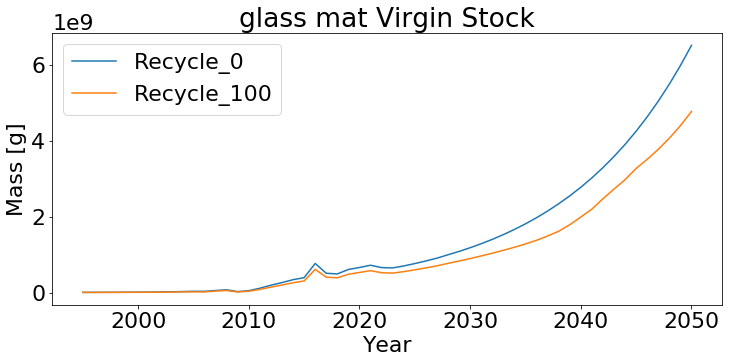

In [68]:
sim1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')
#sim1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_MFG_Landfilled')
#sim1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_EOL_Landfilled')
sim1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Virgin_Stock')

In [67]:
#summ the virgin stock column 1995 through 2050 for the two senarios
#will give a mass difference in extraction needed all time
R_0_virginmass = sim1.scenario['Recycle_0'].material['glass'].materialdata['mat_Virgin_Stock'].sum(axis=0)
R_0_virginmass_kg = R_0_virginmass/1000 #grams in a kg
R_0_virginmass_mtons = R_0_virginmass/1000000 # grams in a metric ton
print('0% recycling scenario requires' , R_0_virginmass_mtons , 'metric tons of virgin glass from 1995 through 2050.')

R_100_virginmass = sim1.scenario['Recycle_100'].material['glass'].materialdata['mat_Virgin_Stock'].sum(axis=0)
R_100_virginmass_kg = R_100_virginmass/1000 #grams in a kg
R_100_virginmass_mtons = R_100_virginmass/1000000 # grams in a metric ton
print('100% recycling scenario requires' , R_100_virginmass_mtons , 'metric tons of virgin glass from 1995 through 2050.')

pct_less_virgin = 100*(R_100_virginmass/R_0_virginmass)
print('100% closed loop recycling scenario requires', pct_less_virgin, 'of the mass of 0% recycling, linear.')

0% recycling scenario requires 78535.27441479037 metric tons of virgin glass from 1995 through 2050.
100% recycling scenario requires 58438.908625045 metric tons of virgin glass from 1995 through 2050.
100% closed loop recycling scenario requires 74.41103257167626 of the mass of 0% recycling, linear.
